In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

df = pd.read_csv("../datasets/USvideos.csv")
with open("../datasets/US_category_id.json") as f:
    category_data = json.load(f)

category_mapping = {
    int(item["id"]): item["snippet"]["title"]
    for item in category_data["items"]
}
df["category"] = df["category_id"].map(category_mapping)

#data cleaning and formatting
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df.drop_duplicates(subset=['video_id', 'trending_date'], inplace=True)
df.dropna(inplace=True)

#### Which types of videos go viral most often?

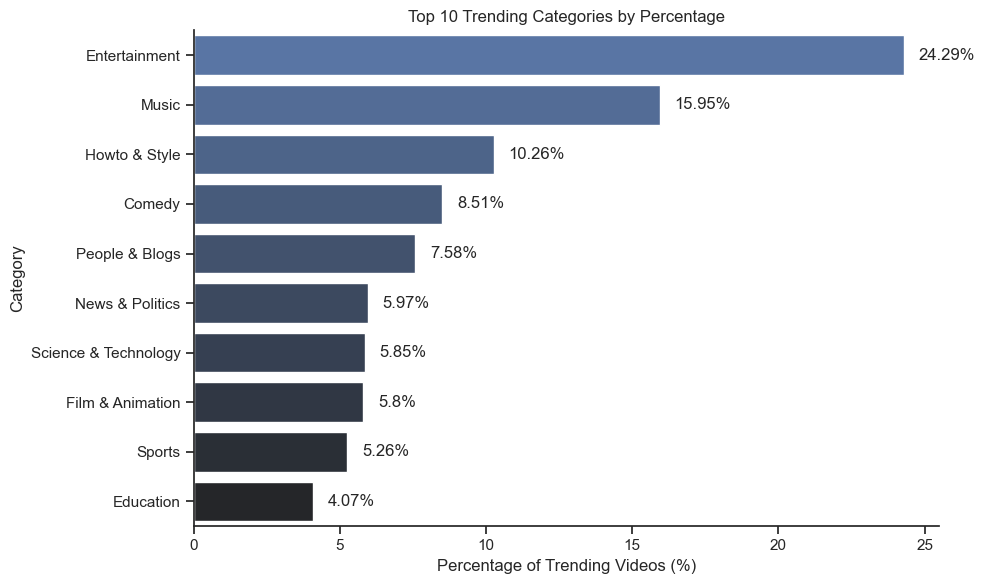

In [27]:
category_percent = (df['category'].value_counts(normalize=True) * 100).round(2).head(10).reset_index()

# Rename columns for clarity
category_percent.columns = ['category', 'percent']

sns.set_theme(style='ticks')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=category_percent, x='percent', y='category',hue='category', palette='dark:b_r', legend=False)

sns.despine(right=True)

# Add title and labels
ax.set_title('Top 10 Trending Categories by Percentage')
ax.set_xlabel('Percentage of Trending Videos (%)')
ax.set_ylabel('Category')

# Annotate each bar with percentage value
for i, row in category_percent.iterrows():
    ax.text(row['percent'] + 0.5, i, f"{row['percent']}%", va='center')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Most Common Trending Categories'}, xlabel='category'>

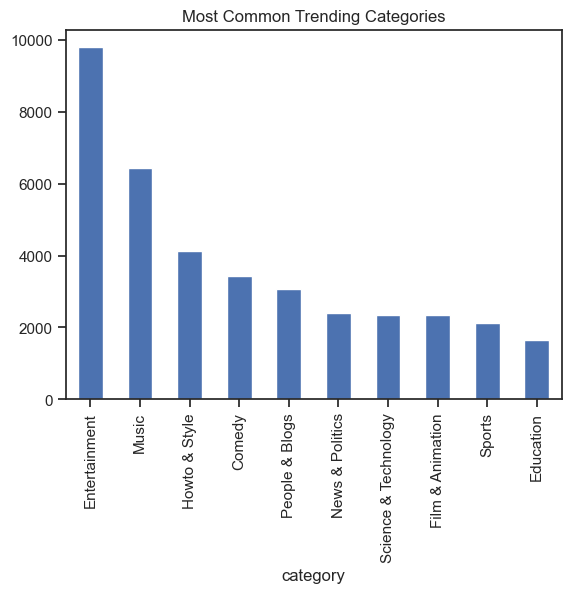

In [28]:
top_categories = df['category'].value_counts().head(10)
top_categories.plot(kind='bar', title='Most Common Trending Categories')
